# Milestone 1 - Supervised Learning
**Author: Hafiz Fahrurrozi**

Using a dataset from Banco de Portugal telemarketing effort (dataset available [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)), create a prediction using supervised machine learning models and evaluate their performance.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    preprocessing, model_selection, metrics, utils, feature_selection,
    linear_model, tree, svm, ensemble, neighbors, naive_bayes)

## Data Loading
Load data from csv file using read_csv(). Since the delimiter is semi-colon (;) we specify it when calling the function.

In [2]:
raw = pd.read_csv('bank-additional-full.csv', delimiter=';')
raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Simple data exploration
Simple data exploration using info() and describe() to see data range, null counts, column data types, and statistical data on numerical columns.

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Statistic description
Next we use describe to 

In [7]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30488.0,39.030012,10.333529,17.000,31.000,37.000,45.000,95.000
duration,30488.0,259.484092,261.714262,0.000,103.000,181.000,321.000,4918.000
campaign,30488.0,2.521451,2.720150,1.000,1.000,2.000,3.000,43.000
pdays,30488.0,956.332295,201.373292,0.000,999.000,999.000,999.000,999.000
previous,30488.0,0.194273,0.522788,0.000,0.000,0.000,0.000,7.000
emp.var.rate,30488.0,-0.071510,1.610399,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,30488.0,93.523311,0.585374,92.201,93.075,93.444,93.994,94.767
cons.conf.idx,30488.0,-40.602263,4.789249,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,30488.0,3.459938,1.777231,0.634,1.313,4.856,4.961,5.045
nr.employed,30488.0,5160.813409,75.158065,4963.600,5099.100,5191.000,5228.100,5228.100


## Data Cleaning
From the dataset description, there are several null values written as unknown in several columns. We replace the unknowns with null values and drop them from the data.

In [ ]:
raw = raw.replace('unknown', np.nan)
raw = raw.dropna()
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

Next in the data description, pdays column have 999 for customers who are called for the first time, which means it is a null value. As seen on simple data exploration using describe() above, the null values are the majority; taking the 1st, 2nd, 3rd, and 4th quartile. We replace this value using the mean of the column without 999.

In [6]:
sl = raw.pdays[raw['pdays'] != 999]
raw.pdays.replace({999:int(sl.mean()+1)}, inplace=True)
raw.pdays.value_counts()

6     29541
3       381
4       102
2        53
9        53
7        50
12       50
5        43
10       40
13       33
11       25
15       22
1        21
14       17
0        14
8        13
16        8
17        6
18        5
22        3
19        3
21        2
25        1
26        1
27        1
Name: pdays, dtype: int64

### Encode binary categorical columns
Since it's more convenient to process the data when all values are numeric, we replace all binary value in categorical columns with 'yes' and 'no' to 1 and 0.

In [7]:
raw.replace({'yes':1,'no':0}, inplace=True)
raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0,0,0,telephone,may,mon,...,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Encode non-binary categorical columns
Next we encode the non-binary categorical columns. For 'day_of_week' and 'month' we use replace() to define the replacement, while other categorical columns are encoded with OneHotEncoder(). We also drop the columns encoded with OneHotEncoder() from original data.

In [8]:
raw.day_of_week.replace({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5},inplace=True)
raw.month.replace({'mar':3,'apr':4,'may':5,'jun':6,'jul':7,
                   'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},inplace=True)
raw.education.replace({'illiterate':0,'basic.4y':1,'basic.6y':2,'basic.9y':3,'high.school':4,
                      'professional.course':5,'university.degree':6}, inplace=True)

ohe = preprocessing.OneHotEncoder(sparse=False, handle_unknown='ignore')
feat = ['job','marital','contact','poutcome']
enc = pd.DataFrame(ohe.fit_transform(raw[feat]))
enc.columns = ohe.get_feature_names(input_features=feat)
raw.drop(columns=feat, inplace=True)
enc.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Data Exploration

### Correlation heatmap
First we want to see the linear correlation between each numerical variable in the data. We use a heatmap to visualize the correlation between variables.

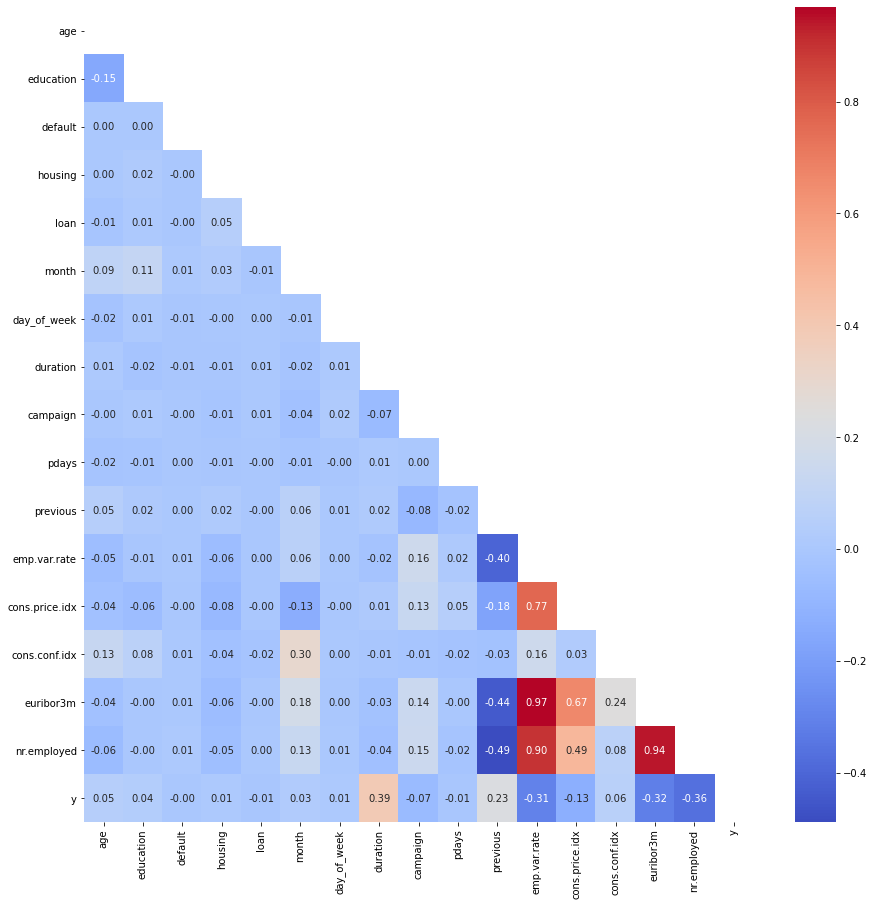

In [9]:
plt.figure(figsize=[15,15])
sns.heatmap(raw.corr(), annot=True, mask=np.triu(raw.corr()), fmt='.2f', cmap='coolwarm')
plt.show()

From the heatmap, 'duration' and 'previous' column have significant positive correlation with target, while 'emp.var.rate', 'euribor3m', and 'nr.employed' have significant negative correlation with target. We can also see that 'emp.var.rate' and 'euribor3m' have high correlation (>0.9) with other features aside from target. 

### Distribution of target
How many people agree to leave a deposit for subscription after the marketing campaign? In the graph below, we can see that nearly 26,700 customer (~87.3%) didn't agree to subscribe (y=0). Using this data for training the model might result in a lower classification performance for one class, so we might need to downsample the majority for training.

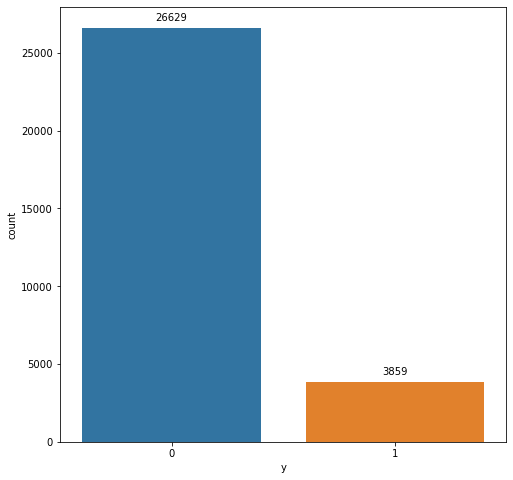

In [10]:
plt.figure(figsize=(8, 8))
splot = sns.countplot(data=raw, x='y')
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center', xytext = (0, 10),
        textcoords = 'offset points')

### Duration of call and marketing success
From below histogram we can see that successful marketing (orange) rises later than unsuccessful ones, which means with longer call duration the chance of success increases.

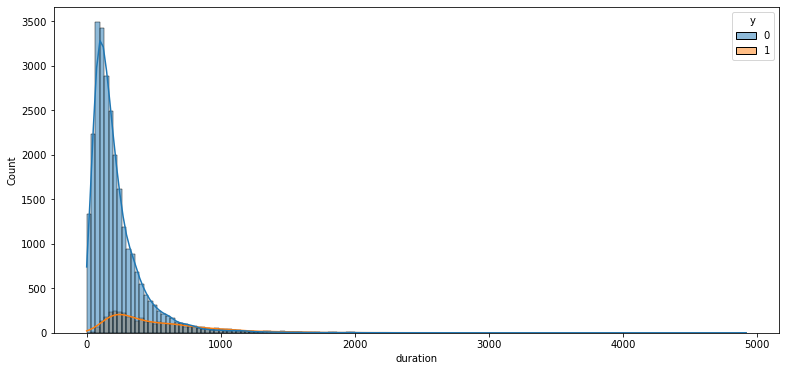

In [11]:
plt.figure(figsize=(13,6))
sns.histplot(data=raw, x='duration', hue='y', bins=150, kde=True)
plt.show()

### Previous contact
Here we can see that customers with previous contact with the bank are more likely to accept the marketing.

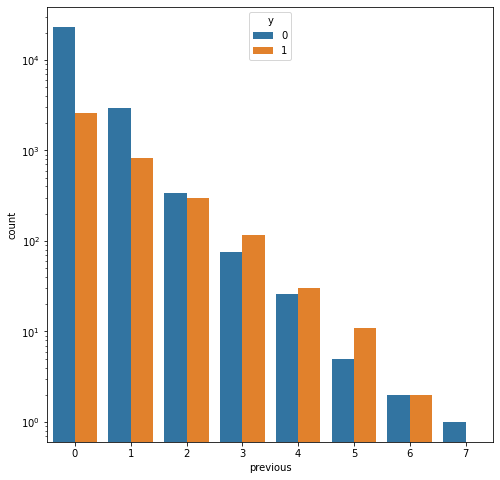

In [12]:
plt.figure(figsize=(8,8))
g = sns.countplot(data=raw, x='previous', hue='y')
g.set_yscale('log')

## Data Preprocessing
### Feature selection
To find which feature to use in our model, we can use mutual_info_classif() to sieve the features.

In [13]:
display(pd.DataFrame(feature_selection.mutual_info_classif(raw.drop(columns='y'), raw.y),index=raw.columns[:-1], columns=['MI Score']))

,MI Score
age,0.011972
education,0.006728
default,0.000474
housing,0.002519
loan,0.000000
month,0.031310
day_of_week,0.001948
duration,0.078565
campaign,0.003946
pdays,0.028642


Drop columns with score below 0.05: age, education, default, housing, loan, month, day_of_week, campaign, pdays, previous

In [14]:
raw.drop(columns=['age','education','default','housing','loan','month','day_of_week','campaign','pdays','previous'], inplace=True)

## Recombine data
After feature selection, we recombine the numerical data with the encoded categorical columns.

In [15]:
raw.reset_index(drop=True,inplace=True)
enc.reset_index(drop=True,inplace=True)
cln = pd.concat([raw,enc],axis=1)
cln.head()

,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,261,1.1,93.994,-36.4,4.857,5191.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,226,1.1,93.994,-36.4,4.857,5191.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,151,1.1,93.994,-36.4,4.857,5191.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,307,1.1,93.994,-36.4,4.857,5191.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,139,1.1,93.994,-36.4,4.857,5191.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### Downsampling
From EDA we see that there is a disparity in target value distribution, so we resample the dataset to balance the target values count for model training.

In [16]:
minor = cln[cln.y==1]
major = cln[cln.y==0]

rmaj = utils.resample(
    major,
    replace=False,
    n_samples=3859,
    random_state=52
)

resam = pd.concat([minor,rmaj], axis=0)

resam.y.value_counts()

1    3859
0    3859
Name: y, dtype: int64

### Splitting data
We will use the resampled data for training and validation, while the full data is for testing the model. We use cross validation to evaluate the model.

In [17]:
xs = resam.drop(columns='y', axis=1)
ys = resam.y
x = cln.drop(columns='y', axis=1)
y = cln.y
display(xs.shape, x.shape)

(7718, 25)

(30488, 25)

### Scale x values
We use StandardScaler() to remove mean and use unit variance for models which performance relies on scaled data. We use fit_transform to our training data and transform to test data.

In [18]:
scaler = preprocessing.StandardScaler()
xst = scaler.fit_transform(xs)
xt = scaler.transform(x)

## Model Definition
For classifying the data, we will use several functions of machine learning in sklearn:
 - Logistic regression
 - Decision tree classifier
 - Random forest classifier
 - Support vector classifier
 - K neighbors classifier
 - Gaussian naive bayes
 - AdaBoost classifier

### Hyperparameter tuning
We want to search for the optimal hyperparameter for our machine learning models with highest score in F1 score. F1 is chosen because we want a balance between precision and recall. For this purpose, we use GridSearchCV() and RandomizedSearchCV which implements exhaustive and randomized search with cross-validated data to find the best parameters from our list. We will use the training set for the grid search.

In [19]:
%%time
tuned_parameters = [
    {
        'C':[1e-2,0.1,1,10,100],
        'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = model_selection.GridSearchCV(
        linear_model.LogisticRegression(random_state=52, n_jobs=6, max_iter=1000),
        tuned_parameters, scoring='%s_macro' % score,
        n_jobs=6, verbose=1
    )
    clf.fit(xst, ys)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

# Tuning hyper-parameters for f1

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters set found on development set:

{'C': 0.1, 'solver': 'liblinear'}

Grid scores on development set:

0.733 (+/-0.345) for {'C': 0.01, 'solver': 'newton-cg'}
0.733 (+/-0.345) for {'C': 0.01, 'solver': 'lbfgs'}
0.735 (+/-0.327) for {'C': 0.01, 'solver': 'liblinear'}
0.733 (+/-0.345) for {'C': 0.01, 'solver': 'sag'}
0.733 (+/-0.345) for {'C': 0.01, 'solver': 'saga'}
0.738 (+/-0.303) for {'C': 0.1, 'solver': 'newton-cg'}
0.738 (+/-0.303) for {'C': 0.1, 'solver': 'lbfgs'}
0.739 (+/-0.298) for {'C': 0.1, 'solver': 'liblinear'}
0.738 (+/-0.303) for {'C': 0.1, 'solver': 'sag'}
0.738 (+/-0.303) for {'C': 0.1, 'solver': 'saga'}
0.734 (+/-0.310) for {'C': 1, 'solver': 'newton-cg'}
0.734 (+/-0.310) for {'C': 1, 'solver': 'lbfgs'}
0.734 (+/-0.310) for {'C': 1, 'solver': 'liblinear'}
0.734 (+/-0.310) for {'C': 1, 'solver': 'sag'}
0.734 (+/-0.310) for {'C': 1, 'solver': 'saga'}
0.733 (+/-0.31

D:\Program\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


In [20]:
%%time
tuned_parameters = [
    {
        'criterion':['gini','entropy'],
        'splitter':['best','random'],
        'max_depth':[2,3,4,5,6,None]
    }
]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = model_selection.GridSearchCV(
        tree.DecisionTreeClassifier(random_state=52),
        tuned_parameters, scoring='%s_macro' % score,
        n_jobs=6, verbose=1
    )
    clf.fit(xs, ys)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

# Tuning hyper-parameters for f1

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}

Grid scores on development set:

0.561 (+/-0.289) for {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
0.378 (+/-0.195) for {'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}
0.564 (+/-0.370) for {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
0.405 (+/-0.255) for {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}
0.513 (+/-0.297) for {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
0.530 (+/-0.321) for {'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}
0.422 (+/-0.145) for {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
0.393 (+/-0.143) for {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}
0.424 (+/-0.144) for {'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}
0.425 (+/-0.140) for {'criterion': 'gini', 

In [21]:
%%time
tuned_parameters = [{'n_estimators':[100,500,1000],
                     'max_depth':[None,3,5],
                     'max_features':['sqrt','log2',None],
                     'class_weight':[None,'balanced']
                    }]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = model_selection.GridSearchCV(
        ensemble.RandomForestClassifier(n_jobs=6, random_state=52),
        tuned_parameters, scoring='%s_macro' % score,
        n_jobs=8, verbose=18
    )
    clf.fit(xs, ys)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

# Tuning hyper-parameters for f1

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters set found on development set:

{'class_weight': None, 'max_depth': 3, 'max_features': None, 'n_estimators': 100}

Grid scores on development set:

0.365 (+/-0.110) for {'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
0.358 (+/-0.088) for {'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}
0.357 (+/-0.089) for {'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1000}
0.363 (+/-0.102) for {'class_weight': None, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
0.365 (+/-0.105) for {'class_weight': None, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 500}
0.366 (+/-0.109) for {'class_weight': None, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 1000}
0.381 (+/-0.119) for {'class_weight': None, 'max_depth': None, 'max_features': None, 'n_est

In [22]:
%%time
tuned_parameters = [
    {
        'C':[0.01,0.1,1,10,100],
        'kernel':['linear','rbf'],
        'gamma':['auto','scale',1e-3],
        'max_iter':[10000,100000],
        'cache_size':[200,256,512,768]
    }
]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = model_selection.RandomizedSearchCV(
        svm.SVC(random_state=52),
        tuned_parameters, scoring='%s_macro' % score,
        n_iter=50, n_jobs=6, verbose=18, random_state=52
    )
    clf.fit(xst, ys)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

# Tuning hyper-parameters for f1

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters set found on development set:

{'max_iter': 10000, 'kernel': 'linear', 'gamma': 'scale', 'cache_size': 200, 'C': 0.1}

Grid scores on development set:

0.649 (+/-0.392) for {'max_iter': 10000, 'kernel': 'linear', 'gamma': 0.001, 'cache_size': 200, 'C': 10}
0.698 (+/-0.394) for {'max_iter': 10000, 'kernel': 'rbf', 'gamma': 'auto', 'cache_size': 512, 'C': 0.01}
0.755 (+/-0.249) for {'max_iter': 10000, 'kernel': 'linear', 'gamma': 'scale', 'cache_size': 200, 'C': 0.1}
0.707 (+/-0.462) for {'max_iter': 10000, 'kernel': 'rbf', 'gamma': 0.001, 'cache_size': 768, 'C': 0.1}
0.755 (+/-0.249) for {'max_iter': 100000, 'kernel': 'linear', 'gamma': 'scale', 'cache_size': 768, 'C': 0.1}
0.694 (+/-0.304) for {'max_iter': 100000, 'kernel': 'linear', 'gamma': 'auto', 'cache_size': 256, 'C': 100}
0.724 (+/-0.413) for {'max_iter': 10000, 'kernel': 'rbf', 'gamma': 0.001, 'cache_size': 512, 'C': 

In [23]:
%%time
tuned_parameters = [
    {
        'n_neighbors':[3,5,7,9,11],
        'weights':['uniform','distance']
    }
]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = model_selection.GridSearchCV(
        neighbors.KNeighborsClassifier(n_jobs=6),
        tuned_parameters, scoring='%s_macro' % score,
        n_jobs=6,verbose=1
    )
    clf.fit(xst, ys)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

# Tuning hyper-parameters for f1

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters set found on development set:

{'n_neighbors': 11, 'weights': 'uniform'}

Grid scores on development set:

0.617 (+/-0.323) for {'n_neighbors': 3, 'weights': 'uniform'}
0.592 (+/-0.289) for {'n_neighbors': 3, 'weights': 'distance'}
0.637 (+/-0.356) for {'n_neighbors': 5, 'weights': 'uniform'}
0.613 (+/-0.326) for {'n_neighbors': 5, 'weights': 'distance'}
0.647 (+/-0.359) for {'n_neighbors': 7, 'weights': 'uniform'}
0.619 (+/-0.340) for {'n_neighbors': 7, 'weights': 'distance'}
0.652 (+/-0.370) for {'n_neighbors': 9, 'weights': 'uniform'}
0.624 (+/-0.344) for {'n_neighbors': 9, 'weights': 'distance'}
0.658 (+/-0.378) for {'n_neighbors': 11, 'weights': 'uniform'}
0.628 (+/-0.353) for {'n_neighbors': 11, 'weights': 'distance'}

Wall time: 5.99 s


In [24]:
%%time
tuned_parameters = [
    {
        'n_estimators':[10,20,30,40,50,100],
        'learning_rate':[0.01,0.1,1,10]
    }
]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = model_selection.GridSearchCV(
        ensemble.AdaBoostClassifier(random_state=52),
        tuned_parameters, scoring='%s_macro' % score,
        n_jobs=6,verbose=1
    )
    clf.fit(xst, ys)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

# Tuning hyper-parameters for f1

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters set found on development set:

{'learning_rate': 0.1, 'n_estimators': 20}

Grid scores on development set:

0.513 (+/-0.379) for {'learning_rate': 0.01, 'n_estimators': 10}
0.514 (+/-0.382) for {'learning_rate': 0.01, 'n_estimators': 20}
0.515 (+/-0.386) for {'learning_rate': 0.01, 'n_estimators': 30}
0.513 (+/-0.384) for {'learning_rate': 0.01, 'n_estimators': 40}
0.515 (+/-0.386) for {'learning_rate': 0.01, 'n_estimators': 50}
0.586 (+/-0.356) for {'learning_rate': 0.01, 'n_estimators': 100}
0.538 (+/-0.431) for {'learning_rate': 0.1, 'n_estimators': 10}
0.624 (+/-0.377) for {'learning_rate': 0.1, 'n_estimators': 20}
0.615 (+/-0.376) for {'learning_rate': 0.1, 'n_estimators': 30}
0.612 (+/-0.370) for {'learning_rate': 0.1, 'n_estimators': 40}
0.620 (+/-0.372) for {'learning_rate': 0.1, 'n_estimators': 50}
0.539 (+/-0.294) for {'learning_rate': 0.1, 'n_estimators': 100}
0.56

### Model definition
Insert our found best parameters into each model.

In [25]:
logreg = linear_model.LogisticRegression(C=0.1, solver='liblinear', max_iter=50000, random_state=52)
dtre = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='best', random_state=52)
ranfor = ensemble.RandomForestClassifier(max_depth=3, n_estimators=100, max_features=None, class_weight=None, n_jobs=6, random_state=52)
svc = svm.SVC(max_iter=100000, kernel='linear', gamma='scale', C=0.1, cache_size=768, random_state=52)
knn = neighbors.KNeighborsClassifier(n_neighbors=11, weights='uniform', n_jobs=6)
gnb = naive_bayes.GaussianNB()
ada = ensemble.AdaBoostClassifier(n_estimators=20, learning_rate=0.1, random_state=52)

## Model Training
Fit the model into training data

In [26]:
%time logreg.fit(xst,ys)

Wall time: 38.1 ms


LogisticRegression(C=0.1, max_iter=50000, random_state=52, solver='liblinear')

In [27]:
%time dtre.fit(xs,ys)

Wall time: 16.6 ms


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=52)

In [28]:
%time ranfor.fit(xs,ys)

Wall time: 308 ms


RandomForestClassifier(max_depth=3, max_features=None, n_jobs=6,
                       random_state=52)

In [29]:
%time svc.fit(xst,ys)

Wall time: 1.53 s


SVC(C=0.1, cache_size=768, kernel='linear', max_iter=100000, random_state=52)

In [30]:
%time knn.fit(xst,ys)

Wall time: 1.95 ms


KNeighborsClassifier(n_jobs=6, n_neighbors=11)

In [31]:
%time gnb.fit(xs,ys)

Wall time: 10.7 ms


GaussianNB()

In [32]:
%time ada.fit(xs,ys)

Wall time: 147 ms


AdaBoostClassifier(learning_rate=0.1, n_estimators=20, random_state=52)

## Model evaluation

### Cross validation
Cross validate the model using 5-fold cross validation on training set.

The result is displayed on the table below. From cross validation result, all models achieve less than 80% accuracy and F1 score. There's similarly low precision and recall macro score which tells us that misclassification is still high, despite the model optimized with resampled training set containing equal value of both labels.

In [33]:
scorers=['accuracy','f1_macro','precision_macro','recall_macro']
results=['test_accuracy','test_precision_macro','test_recall_macro','test_f1_macro']
cindex =['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Support Vector Classifier',
         'K-Neighbors Classifier','Gaussian Naive Bayes','AdaBoost Classifier']

In [34]:
s1 = model_selection.cross_validate(logreg, xst, ys, scoring=scorers, n_jobs=6)
s2 = model_selection.cross_validate(dtre, xs, ys, scoring=scorers, n_jobs=6)
s3 = model_selection.cross_validate(ranfor, xs, ys, scoring=scorers, n_jobs=6)
s4 = model_selection.cross_validate(svc, xst, ys, scoring=scorers, n_jobs=6)
s5 = model_selection.cross_validate(knn, xst, ys, scoring=scorers, n_jobs=6)
s6 = model_selection.cross_validate(gnb, xs, ys, scoring=scorers, n_jobs=6)
s7 = model_selection.cross_validate(ada, xs, ys, scoring=scorers, n_jobs=6)

scum = pd.DataFrame(index=cindex)
for i in range(len(scorers)):
    scum[scorers[i]] = [
        s1[results[i]].mean(),s2[results[i]].mean(),s3[results[i]].mean(),
        s4[results[i]].mean(),s5[results[i]].mean(),s6[results[i]].mean(),
        s7[results[i]].mean(),]

display(scum)

,accuracy,f1_macro,precision_macro,recall_macro
Logistic Regression,0.751904,0.764106,0.751904,0.738734
Decision Tree Classifier,0.605892,0.582413,0.605854,0.568066
Random Forest Classifier,0.626355,0.606548,0.626322,0.593321
Support Vector Classifier,0.763174,0.774771,0.763173,0.755244
K-Neighbors Classifier,0.684416,0.679033,0.684419,0.658072
Gaussian Naive Bayes,0.702554,0.684780,0.702557,0.680741
AdaBoost Classifier,0.652915,0.628053,0.652896,0.624408


## Model Inference

### Predict test set
Predict classification result on the full data set and scoring metrics.

Test scores fare better than training score, with several models have accuracy higher than 80%.

In [35]:
lres = ['f1-score','precision','recall']

cr1 = metrics.classification_report(y,logreg.predict(xt), output_dict=True)
cr2 = metrics.classification_report(y,dtre.predict(x), output_dict=True)
cr3 = metrics.classification_report(y,ranfor.predict(x), output_dict=True)
cr4 = metrics.classification_report(y,svc.predict(xt), output_dict=True)
cr5 = metrics.classification_report(y,knn.predict(xt), output_dict=True)
cr6 = metrics.classification_report(y,gnb.predict(x), output_dict=True)
cr7 = metrics.classification_report(y,ada.predict(x), output_dict=True)

res = pd.DataFrame(index=cindex)

for i in range(len(lres)):
    if i == 0:
        res['accuracy'] = [
            cr1['accuracy'], cr2['accuracy'], cr3['accuracy'], cr4['accuracy'],
            cr5['accuracy'], cr6['accuracy'], cr7['accuracy']
        ]
    res[lres[i]] = [
        cr1['macro avg'][lres[i]], cr2['macro avg'][lres[i]], cr3['macro avg'][lres[i]],
        cr4['macro avg'][lres[i]], cr5['macro avg'][lres[i]], cr6['macro avg'][lres[i]],
        cr7['macro avg'][lres[i]]
    ]


display(res)

,accuracy,f1-score,precision,recall
Logistic Regression,0.843315,0.741587,0.707046,0.847375
Decision Tree Classifier,0.811532,0.710962,0.684443,0.838931
Random Forest Classifier,0.807793,0.708801,0.683487,0.841997
Support Vector Classifier,0.837018,0.737041,0.703548,0.851415
K-Neighbors Classifier,0.832655,0.731800,0.699434,0.847256
Gaussian Naive Bayes,0.786211,0.662468,0.643893,0.755302
AdaBoost Classifier,0.796084,0.699920,0.678729,0.844157


### Confusion matrix
All trained models have high false positive rate for class 1 (subscription) based on the confusion matrix of test set.

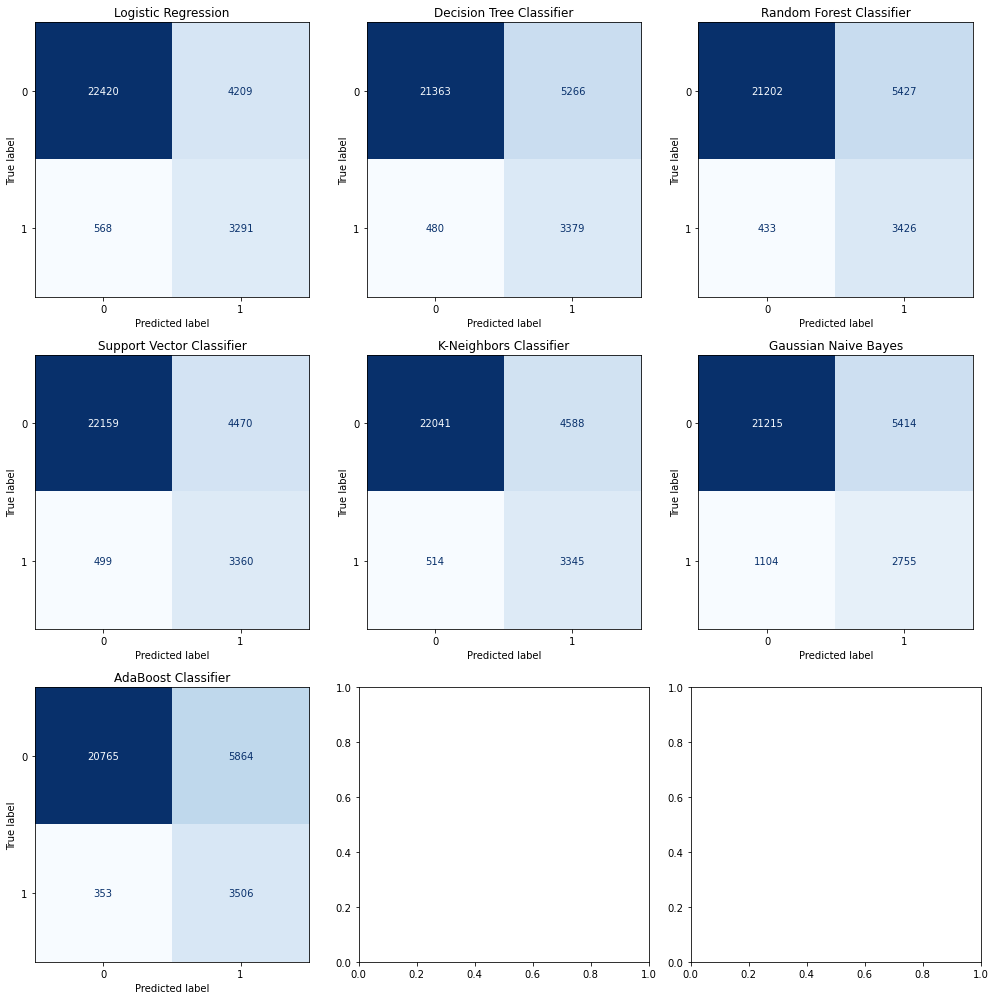

In [36]:
cm1 = metrics.confusion_matrix(y, logreg.predict(xt))
cm2 = metrics.confusion_matrix(y, dtre.predict(x))
cm3 = metrics.confusion_matrix(y, ranfor.predict(x))
cm4 = metrics.confusion_matrix(y, svc.predict(xt))
cm5 = metrics.confusion_matrix(y, knn.predict(xt))
cm6 = metrics.confusion_matrix(y, gnb.predict(x))
cm7 = metrics.confusion_matrix(y, ada.predict(x))

clist = [cm1,cm2,cm3,cm4,cm5,cm6,cm7]

fig, axes = plt.subplots(3, 3, figsize=(14, 14))
for cls, ax, j in zip(clist, axes.flatten(), range(len(cindex))):
    metrics.ConfusionMatrixDisplay(cls).plot(cmap='Blues', colorbar=False, ax=ax)
    ax.title.set_text(cindex[j])
plt.tight_layout()
plt.show()

### Model performance comparison
From the graph below we can see that logistic regression achieve the highest accuracy and f1 score, followed by support vector classifier.

<AxesSubplot:>

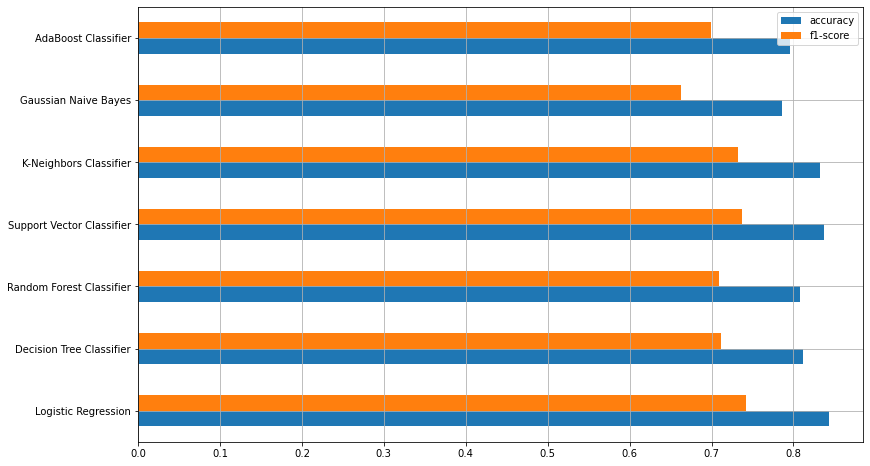

In [37]:
res.plot(kind='barh', y=['accuracy','f1-score'], figsize=(13, 8), rot=0, grid=True)

### Train-test score difference on best model
The difference between training and test scores for logistic regression is around -0.10 - 0.04, showing higher scores on test accuracy and recall. The highest difference is in recall score, while there is little difference in F1 and precision score.

While the difference between values is rather small, the overall scores are below 0.8 except for accuracy and recall.

In [38]:
print('Accuracy difference :',(scum.accuracy[0] - res.accuracy[0]),
      '\nF1 difference :', (scum['f1_macro'][0] - res['f1-score'][0]),
      '\nPrecision difference :', (scum['precision_macro'][0] - res['precision'][0]),
      '\nRecall difference :', (scum['recall_macro'][0] - res['recall'][0]),
     )

Accuracy difference : -0.09141118214938526 
F1 difference : 0.02251869717952626 
Precision difference : 0.0448584672739093 
Recall difference : -0.10864144242074392


## Conclusion
Based on the result above, logistic regression is the best performing model among the models used in the work.

On model performance: Resampling imbalanced class might have helped classification performance on the minor class, but also brings a higher misclassification. As seen on the confusion matrix, the precision of class 1 is below 50% (more false positive than true positive) despite using the best performing hyperparameter based on training data.